In [ ]:
# Code by Son Nguyen

In [1]:
import pandas as pd
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import StandardScaler

In [2]:
drought = pd.read_csv('temperature and precipitation/final_drought_temp_data.csv')

In [3]:
drought['climate_regions']=drought['Name']

#### David's Code

In [4]:
oh='Ohio Valley'
ohio_valley=dict.fromkeys(['Illinois','Indiana','Kentucky','Missouri',
             'Ohio','Tennessee','West Virginia'],oh)
#https://stackoverflow.com/questions/11977730/creating-a-dictionary-with-same-values

In [5]:
oh_list=['Illinois','Indiana','Kentucky','Missouri',
             'Ohio','Tennessee','West Virginia']

In [6]:
def state_region_dict(list_states,string_region):
    return dict.fromkeys(list_states,string_region)
#function to combine states and region into dictionary


In [7]:
um_list=['Iowa', 'Michigan', 'Minnesota', 'Wisconsin']
um_region='Upper Midwest'
upper_midwest=state_region_dict(um_list,um_region)


In [8]:
ne_list=['Connecticut','Delaware','Maine','Maryland','Massachusetts', 'New Hampshire', 'New Jersey',
        'New York', 'Pennsylvania','Rhode Island','Vermont']
ne_region='Northeast'
north_east=state_region_dict(ne_list,ne_region)

In [9]:
nw_list=['Idaho','Oregon','Washington']
nw_region='Northwest'
north_west=state_region_dict(nw_list,nw_region)

s_list=['Arkansas','Kansas','Louisiana','Mississippi','Oklahoma','Texas']
s_region='South'
south=state_region_dict(s_list,s_region)

se_list=['Alabama','Florida','Georgia','North Carolina','South Carolina','Virginia']
se_region='Southeast'
south_east=state_region_dict(se_list,se_region)

sw_list=['Arizona','Colorado','New Mexico','Utah']
sw_region='Southwest'
south_west=state_region_dict(sw_list,sw_region)

w_list=['California','Nevada']
w_region='West'
west=state_region_dict(w_list,w_region)

wnc_list=['Montana','Nebraska','North Dakota','South Dakota','Wyoming']
wnc_region='Northern Rockies and Plains'
northern_rockies=state_region_dict(wnc_list,wnc_region)

In [10]:
final_dict={**ohio_valley,**upper_midwest,**north_east,**north_west,**south,
            **south_east,**south_west,**west,**northern_rockies}
#combine multiple dictionaries into one
#https://towardsdatascience.com/merge-dictionaries-in-python-d4e9ce137374

In [11]:
drought['climate_regions']=drought['Name']

In [12]:
#Replaced initial values with dictionary region values
drought.replace({'climate_regions':final_dict},inplace=True)
#https://sparkbyexamples.com/pandas/pandas-remap-values-in-column-with-a-dictionary-dict/

In [13]:
drought['ValidEnd'] = pd.to_datetime(drought['ValidEnd'])

In [14]:
drought = drought[drought['ValidEnd']<'2021-01-01']

In [15]:
ohio_valley = drought[drought['climate_regions'] == 'Ohio Valley']

In [16]:
west = drought[drought['climate_regions'] == 'West']

In [17]:
up_mid = drought[drought['climate_regions'] == 'Upper Midwest']

In [18]:
nrp = drought[drought['climate_regions'] == 'Northern Rockies and Plains']

In [19]:
ne = drought[drought['climate_regions'] == 'Northeast']

In [20]:
nw = drought[drought['climate_regions'] == 'Northwest']

In [21]:
south = drought[drought['climate_regions'] == 'South']

In [22]:
sw = drought[drought['climate_regions'] == 'Southwest']

In [23]:
se = sw = drought[drought['climate_regions'] == 'Southeast']

In [24]:
ohio_valley

,ValidEnd,Name,state,area_none,area_d0,area_d1,area_d2,area_d3,area_d4,population_none,...,population_d3,population_d4,DSCI,total_area,total_population,avg_tmax,avg_tmin,total_avg_prcp_inches,total_avg_prcp_mm,climate_regions
10451,2020-12-28,Illinois,IL,33454.57,15550.66,6236.48,1140.83,0.0,0.0,8875219.25,...,0.0,0.0,56,56382.54,12847389.79,38.465714,17.117143,0.108000,2.743200,Ohio Valley
10452,2020-12-21,Illinois,IL,33454.57,15550.66,6236.48,1140.83,0.0,0.0,8875219.25,...,0.0,0.0,56,56382.54,12847389.79,39.528571,26.411429,0.006000,0.152400,Ohio Valley
10453,2020-12-14,Illinois,IL,32814.14,16191.10,6236.48,1140.83,0.0,0.0,8839298.46,...,0.0,0.0,57,56382.55,12847389.79,44.220000,29.057143,1.026000,26.060400,Ohio Valley
10454,2020-12-07,Illinois,IL,32794.13,18023.24,4619.65,945.53,0.0,0.0,8650968.46,...,0.0,0.0,53,56382.55,12847389.80,43.485714,24.954286,0.000000,0.000000,Ohio Valley
10455,2020-11-30,Illinois,IL,28067.62,21244.44,6124.95,945.53,0.0,0.0,8375517.01,...,0.0,0.0,64,56382.54,12847389.80,46.328571,32.782857,1.082000,27.482800,Ohio Valley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45975,2001-01-29,West Virginia,WV,3547.74,19253.58,1403.34,0.00,0.0,0.0,261876.40,...,0.0,0.0,91,24204.66,1852994.01,40.380952,19.880952,0.223333,5.672667,Ohio Valley
45976,2001-01-22,West Virginia,WV,5496.60,14287.99,3143.43,1276.64,0.0,0.0,443651.89,...,0.0,0.0,101,24204.66,1852994.00,35.142857,23.095238,1.165000,29.591000,Ohio Valley
45977,2001-01-15,West Virginia,WV,7763.39,12021.20,3143.44,1276.64,0.0,0.0,664684.83,...,0.0,0.0,91,24204.67,1852994.00,43.904762,24.714286,0.008333,0.211667,Ohio Valley
45978,2001-01-08,West Virginia,WV,7763.16,12391.29,3670.41,379.81,0.0,0.0,664647.42,...,0.0,0.0,86,24204.67,1852993.99,33.119048,21.452381,0.055000,1.397000,Ohio Valley


#### Julio's Code

In [25]:
#julio's code
west=west.groupby('ValidEnd').agg({'area_none':'sum','area_d0':'sum','area_d1':'sum','area_d2':'sum','area_d3':'sum','area_d4':'sum',
                                                  'population_none':'sum','population_d0':'sum','population_d1':'sum','population_d2':'sum','population_d3':'sum',
                                                  'population_d4':'sum','DSCI':'mean','total_population':'sum','total_area':'sum', 'avg_tmax': 'mean', 'avg_tmin': 'mean', 'total_avg_prcp_inches':'sum', 'total_avg_prcp_mm': 'sum'})

In [26]:
west

,area_none,area_d0,area_d1,area_d2,area_d3,area_d4,population_none,population_d0,population_d1,population_d2,population_d3,population_d4,DSCI,total_population,total_area,avg_tmax,avg_tmin,total_avg_prcp_inches,total_avg_prcp_mm
ValidEnd,,,,,,,,,,,,,,,,,,,
2001-01-01,268682.71,0.00,0.00,0.00,0.00,0.00,39954507.39,0.00,0.00,0.00,0.00,0.00,0.0,39954507.39,268682.71,55.340909,25.125000,0.000000,0.000000
2001-01-08,219867.53,48815.18,0.00,0.00,0.00,0.00,19148835.12,20805672.27,0.00,0.00,0.00,0.00,15.5,39954507.39,268682.71,56.907792,26.157468,0.573636,14.570364
2001-01-15,183369.34,85313.37,0.00,0.00,0.00,0.00,19147061.90,20807445.49,0.00,0.00,0.00,0.00,29.5,39954507.39,268682.71,45.813312,28.798701,1.895909,48.156091
2001-01-22,229132.27,39550.44,0.00,0.00,0.00,0.00,38419211.81,1535295.58,0.00,0.00,0.00,0.00,15.0,39954507.39,268682.71,47.125649,23.713312,0.072500,1.841500
2001-01-29,193653.20,75029.51,0.00,0.00,0.00,0.00,38179628.97,1774878.42,0.00,0.00,0.00,0.00,28.5,39954507.39,268682.71,46.303571,27.376623,1.511818,38.400182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-30,5542.04,34654.88,60303.12,60478.93,88304.37,19399.37,5547783.11,14970129.93,5063039.47,10253169.73,2805310.34,1315074.81,304.5,39954507.39,268682.71,56.321537,27.510931,0.078106,1.983894
2020-12-07,5473.73,34723.19,60303.12,60312.51,84406.25,23463.92,5523003.27,14994909.77,5063039.47,10252697.32,2798285.43,1322572.14,306.5,39954507.40,268682.72,57.441558,25.848864,0.075455,1.916545
2020-12-14,0.00,7958.10,54374.95,93821.89,89063.85,23463.92,0.00,6801658.18,16499875.50,12485483.68,2844917.89,1322572.14,333.0,39954507.39,268682.71,52.524567,28.696212,0.907500,23.050500


#### Son's Code

In [27]:
#plotting Drought history
def plot_dsci(region, name):
    region['DSCI'].plot(figsize = (10, 8))
    plt.xlabel("Year")
    plt.ylabel("DSCI (Severity Level)")
    plt.title(f'{name} Region Drought Severity 2001-2020')
    plt.savefig('fig.png')

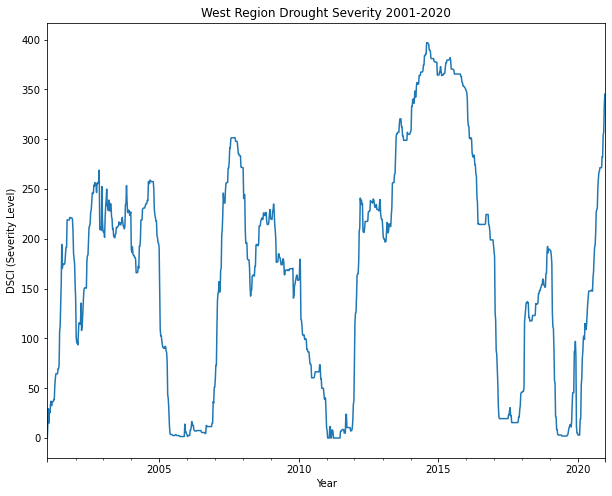

In [28]:
plot_dsci(west, 'West')

In [29]:
#creating function to create window size and DF input. window size or kernal size 
#is used by NN to make predictions on next iteration.
# Code modified from Greg Hogg https://www.youtube.com/watch?v=kGdbPnMCdOg
def df_to_X_y(df, windowsize=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-windowsize):
        row = [[a] for a in df_as_np[i:i+5]]
        X.append(row)
        label = df_as_np[i+5]
        y.append(label)
    return np.array(X), np.array(y)

In [30]:
WINDOW_SIZE = 5
X, y = df_to_X_y(west['DSCI'], WINDOW_SIZE)
X.shape, y.shape

((1039, 5, 1), (1039,))

In [31]:
#Creating training, val, and test set
X_train, y_train = X[:750], y[:750]
X_val, y_val = X[750:850], y[750:850]
X_test, y_test = X[850:], y[850:]

In [32]:
#imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import * 
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dense (Dense)                (None, 8)                 520       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [33]:
#Model checkpoint, saving best model. 
#Loss function is measured on MSE and metrics used is RMSE
cp = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer = Adam(learning_rate=0.005), metrics=[RootMeanSquaredError()])

In [34]:
#Saving history to view loss
history = (model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp]))

Epoch 1/10
24/24 [==============================] - 4s 35ms/step - loss: 42249.7852 - root_mean_squared_error: 205.5475 - val_loss: 66924.7188 - val_root_mean_squared_error: 258.6981


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 2/10
24/24 [==============================] - 0s 7ms/step - loss: 38227.5977 - root_mean_squared_error: 195.5188 - val_loss: 60298.3711 - val_root_mean_squared_error: 245.5573


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 3/10
24/24 [==============================] - 0s 15ms/step - loss: 33277.7773 - root_mean_squared_error: 182.4220 - val_loss: 52437.2500 - val_root_mean_squared_error: 228.9918


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 4/10
24/24 [==============================] - 0s 6ms/step - loss: 27427.6348 - root_mean_squared_error: 165.6129 - val_loss: 43570.8984 - val_root_mean_squared_error: 208.7364


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 5/10
24/24 [==============================] - 0s 6ms/step - loss: 21352.2441 - root_mean_squared_error: 146.1241 - val_loss: 34419.6797 - val_root_mean_squared_error: 185.5254


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 6/10
24/24 [==============================] - 0s 8ms/step - loss: 15633.7451 - root_mean_squared_error: 125.0350 - val_loss: 25900.6680 - val_root_mean_squared_error: 160.9368


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 7/10
24/24 [==============================] - 1s 32ms/step - loss: 10778.3721 - root_mean_squared_error: 103.8189 - val_loss: 18604.8770 - val_root_mean_squared_error: 136.3997


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 8/10
24/24 [==============================] - 0s 7ms/step - loss: 7124.5815 - root_mean_squared_error: 84.4072 - val_loss: 12826.8076 - val_root_mean_squared_error: 113.2555


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 9/10
24/24 [==============================] - 0s 12ms/step - loss: 4608.3052 - root_mean_squared_error: 67.8845 - val_loss: 8962.2314 - val_root_mean_squared_error: 94.6691


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 10/10
24/24 [==============================] - 0s 10ms/step - loss: 3157.8044 - root_mean_squared_error: 56.1943 - val_loss: 6505.5474 - val_root_mean_squared_error: 80.6570


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


In [35]:
#Creating DF for loss history
history_df = pd.DataFrame(history.history)
history_df

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,42249.785156,205.547531,66924.718750,258.698120
1,38227.597656,195.518784,60298.371094,245.557266
2,33277.777344,182.421982,52437.250000,228.991806
3,27427.634766,165.612900,43570.898438,208.736435
4,21352.244141,146.124069,34419.679688,185.525421
5,15633.745117,125.034973,25900.667969,160.936844
6,10778.372070,103.818939,18604.876953,136.399689
7,7124.581543,84.407234,12826.807617,113.255501
8,4608.305176,67.884499,8962.231445,94.669060
9,3157.804443,56.194344,6505.547363,80.656975


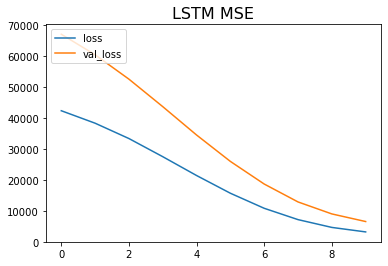

In [36]:
#plotting loss
history_df.filter(like='loss').plot()
plt.title("LSTM MSE", fontsize=16)
plt.legend(loc='uppesr left')
plt.savefig('fig2.png')

In [37]:
from tensorflow.keras.models import load_model
model1 = load_model("model1/")

In [38]:
#Predictions
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals': y_train})
train_results

,Train Predictions,Actuals
0,28.793245,25.5
1,31.577499,34.0
2,38.771011,37.0
3,42.849777,32.5
4,35.478924,36.0
...,...,...
745,226.539474,379.5
746,226.539490,380.0
747,226.539490,380.5
748,226.539505,382.0


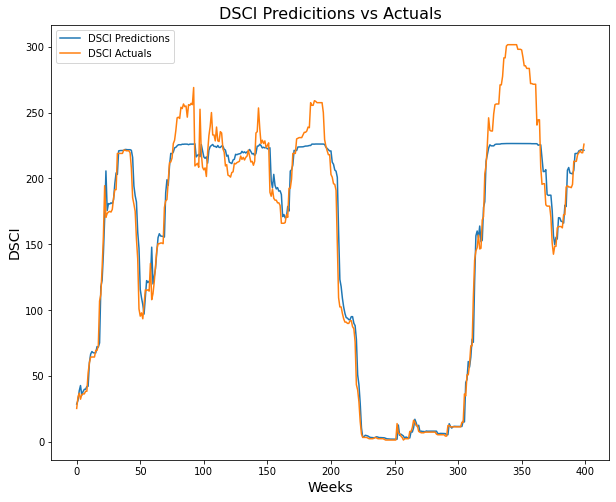

In [39]:
#plot pred vs actuals
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.plot(train_results['Train Predictions'][:400], label = 'DSCI Predictions')
plt.plot(train_results['Actuals'][:400], label = "DSCI Actuals")
plt.xlabel("Weeks", fontsize=14)
plt.ylabel("DSCI", fontsize=14)
plt.title("DSCI Predicitions vs Actuals", fontsize=16)
plt.legend(loc='upper left')
plt.savefig('fig1.png')

In [40]:
#Validation set results
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals': y_val})
val_results

,Val Predictions,Actuals
0,226.539459,370.5
1,226.539124,370.5
2,226.539124,370.5
3,226.539093,370.5
4,226.539124,370.0
...,...,...
95,19.604027,19.5
96,19.604029,19.5
97,19.604029,19.5
98,19.604029,19.5


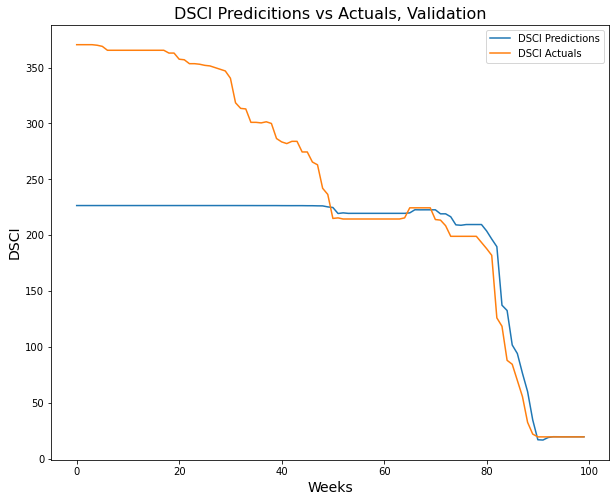

In [41]:
#plot validation set 
plt.figure(figsize = (10,8))
plt.plot(val_results['Val Predictions'], label = 'DSCI Predictions')
plt.plot(val_results['Actuals'], label = 'DSCI Actuals')
plt.xlabel("Weeks", fontsize=14)
plt.ylabel("DSCI", fontsize=14)
plt.title("DSCI Predicitions vs Actuals, Validation", fontsize=16)
plt.legend()
plt.savefig('fig3.png')

In [42]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':val_predictions, 'Actuals': y_val})
test_results

,Test Predictions,Actuals
0,226.539459,370.5
1,226.539124,370.5
2,226.539124,370.5
3,226.539093,370.5
4,226.539124,370.0
...,...,...
95,19.604027,19.5
96,19.604029,19.5
97,19.604029,19.5
98,19.604029,19.5


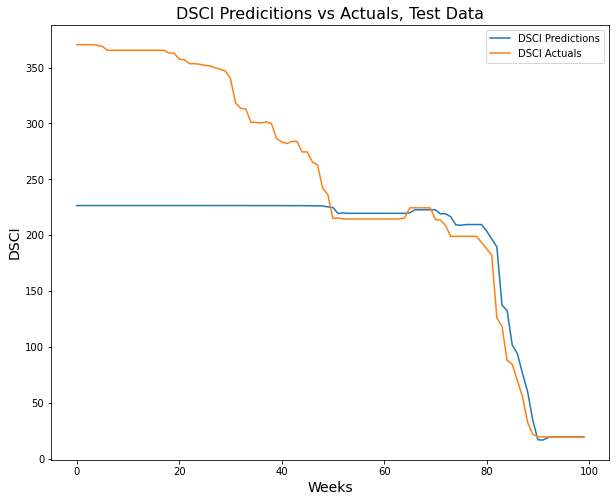

In [43]:
plt.figure(figsize = (10,8))
plt.plot(test_results['Test Predictions'], label = 'DSCI Predictions')
plt.plot(test_results['Actuals'], label = 'DSCI Actuals')
plt.xlabel("Weeks", fontsize=14)
plt.ylabel("DSCI", fontsize=14)
plt.title("DSCI Predicitions vs Actuals, Test Data", fontsize=16)
plt.legend()
plt.savefig('fig4.png')

In [44]:
#plotting predictions 
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(fignum, model, X, y, start = 0, end=100):
    predictions = model.predict(X).flatten()
    df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
    plt.figure(figsize = (10,8))
    plt.plot(df['Predictions'][start:end], label = 'DSCI Predictions')
    plt.plot(df['Actuals'][start:end], label = 'DSCI Actuals' )
    plt.xlabel("Weeks", fontsize=14)
    plt.ylabel("DSCI", fontsize=14)
    plt.title("DSCI Predicitions vs Actuals", fontsize=16)
    plt.legend()
    plt.savefig(f'fig{str(fignum)}.png')
    return df, mse(y, predictions)

(     Predictions  Actuals
 0      19.604029     19.5
 1      19.604029     19.5
 2      19.604029     19.5
 3      19.604029     19.5
 4      19.604029     19.5
 ..           ...      ...
 184   226.442215    304.5
 185   226.511841    306.5
 186   226.515442    333.0
 187   226.533569    345.5
 188   226.536591    345.5
 
 [189 rows x 2 columns],
 535.461774283853)

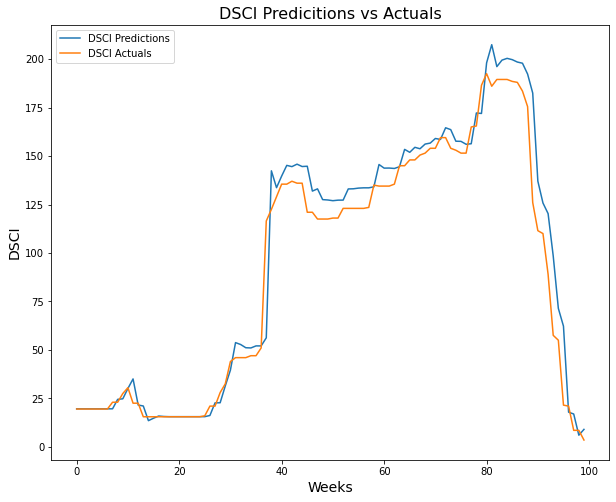

In [45]:
plot_predictions1(5, model1, X_test, y_test)

In [46]:
model2 = Sequential()
model2.add(InputLayer((5,1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))
model2.summary()

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 4, 64)             192       
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 2056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 4, 64)             192       
______________________________

In [47]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer = Adam(learning_rate=0.005), metrics=[RootMeanSquaredError()])

In [48]:
history = (model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp2]))

Epoch 1/10
24/24 [==============================] - 2s 18ms/step - loss: 5042.3530 - root_mean_squared_error: 71.0095 - val_loss: 1254.2239 - val_root_mean_squared_error: 35.4150
INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 2/10
24/24 [==============================] - 0s 6ms/step - loss: 430.8938 - root_mean_squared_error: 20.7580 - val_loss: 655.7206 - val_root_mean_squared_error: 25.6070
INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 3/10
24/24 [==============================] - 0s 5ms/step - loss: 268.2562 - root_mean_squared_error: 16.3785 - val_loss: 266.0456 - val_root_mean_squared_error: 16.3109
INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 4/10
24/24 [==============================] - 0s 6ms/step - loss: 234.0432 - root_mean_squared_error: 15.2985 - val_loss: 279.0562 - val_root_mean_squared_error: 16.7050
Epoch 5/10
24/24 [==============================] - 0s 8ms/step - loss: 214.1099 - root_mean_squared_error: 14.6325 - val_loss: 217.7237 - val_root_mean_squared_error: 14.7555
INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 6/10
24/24 [==============================] - 0s 5ms/step - loss: 194.3994 - root_mean_squared_error: 13.9427 - val_loss: 290.9766 - val_root_mean_squared_error: 17.0580
Epoch 7/10
24/24 [==============================] - 0s 7ms/step - loss: 176.1201 - root_mean_squared_error: 13.2710 - val_loss: 200.4177 - val_root_mean_squared_error: 14.1569
INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 8/10
24/24 [==============================] - 0s 5ms/step - loss: 195.4980 - root_mean_squared_error: 13.9821 - val_loss: 361.2017 - val_root_mean_squared_error: 19.0053
Epoch 9/10
24/24 [==============================] - 0s 5ms/step - loss: 151.2532 - root_mean_squared_error: 12.2985 - val_loss: 168.9374 - val_root_mean_squared_error: 12.9976
INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 10/10
24/24 [==============================] - 0s 7ms/step - loss: 135.4673 - root_mean_squared_error: 11.6390 - val_loss: 186.8507 - val_root_mean_squared_error: 13.6693


In [49]:
history_df = pd.DataFrame(history.history)
history_df

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,5042.353027,71.009529,1254.223877,35.415024
1,430.893829,20.757982,655.720642,25.607042
2,268.256226,16.378529,266.045593,16.310904
3,234.043182,15.298470,279.056152,16.704973
4,214.109894,14.632494,217.723694,14.755464
5,194.399399,13.942719,290.976593,17.058037
6,176.120102,13.271025,200.417694,14.156896
7,195.498047,13.982061,361.201691,19.005306
8,151.253189,12.298504,168.937439,12.997594
9,135.467285,11.639041,186.850677,13.669333


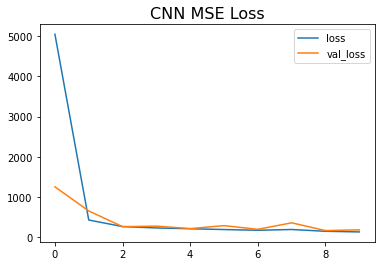

In [50]:
history_df.filter(like='loss').plot();
plt.title("CNN MSE Loss", fontsize=16)
plt.savefig('fig6.png')

In [51]:
model3 = Sequential()
model3.add(InputLayer((5,1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 64)                12864     
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [52]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer = Adam(learning_rate=0.005), metrics=[RootMeanSquaredError()])

In [53]:
history = (model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp3]))

Epoch 1/10
24/24 [==============================] - 7s 35ms/step - loss: 39594.5664 - root_mean_squared_error: 198.9838 - val_loss: 59320.0938 - val_root_mean_squared_error: 243.5572


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 2/10
24/24 [==============================] - 1s 22ms/step - loss: 29447.8926 - root_mean_squared_error: 171.6039 - val_loss: 42416.2852 - val_root_mean_squared_error: 205.9521


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 3/10
24/24 [==============================] - 0s 11ms/step - loss: 18431.8848 - root_mean_squared_error: 135.7641 - val_loss: 26527.0898 - val_root_mean_squared_error: 162.8714


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 4/10
24/24 [==============================] - 0s 9ms/step - loss: 9667.7051 - root_mean_squared_error: 98.3245 - val_loss: 14575.0078 - val_root_mean_squared_error: 120.7270


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 5/10
24/24 [==============================] - 0s 9ms/step - loss: 4633.3032 - root_mean_squared_error: 68.0684 - val_loss: 7644.3086 - val_root_mean_squared_error: 87.4317


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 6/10
24/24 [==============================] - 0s 7ms/step - loss: 2430.1008 - root_mean_squared_error: 49.2961 - val_loss: 4506.8198 - val_root_mean_squared_error: 67.1329


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 7/10
24/24 [==============================] - 0s 7ms/step - loss: 1490.1039 - root_mean_squared_error: 38.6019 - val_loss: 2589.1069 - val_root_mean_squared_error: 50.8833


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 8/10
24/24 [==============================] - 0s 9ms/step - loss: 909.4549 - root_mean_squared_error: 30.1572 - val_loss: 1597.1847 - val_root_mean_squared_error: 39.9648


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 9/10
24/24 [==============================] - 0s 9ms/step - loss: 610.8624 - root_mean_squared_error: 24.7156 - val_loss: 917.9797 - val_root_mean_squared_error: 30.2982


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 10/10
24/24 [==============================] - 0s 9ms/step - loss: 421.3126 - root_mean_squared_error: 20.5259 - val_loss: 652.4337 - val_root_mean_squared_error: 25.5428


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


(     Predictions  Actuals
 0      21.667450     19.5
 1      21.667450     19.5
 2      21.667450     19.5
 3      21.667450     19.5
 4      21.667450     19.5
 ..           ...      ...
 184   307.018463    304.5
 185   317.092896    306.5
 186   317.982574    333.0
 187   322.054596    345.5
 188   322.662537    345.5
 
 [189 rows x 2 columns],
 160.91364023588307)

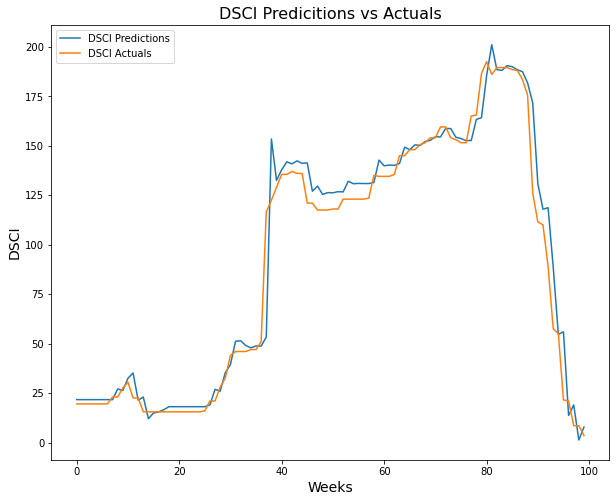

In [54]:
plot_predictions1(7, model3, X_test, y_test)

In [55]:
history_df = pd.DataFrame(history.history)
history_df

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,39594.566406,198.983841,59320.093750,243.557175
1,29447.892578,171.603882,42416.285156,205.952148
2,18431.884766,135.764084,26527.089844,162.871384
3,9667.705078,98.324486,14575.007812,120.726997
4,4633.303223,68.068375,7644.308594,87.431740
5,2430.100830,49.296051,4506.819824,67.132851
6,1490.103882,38.601864,2589.106934,50.883266
7,909.454895,30.157169,1597.184692,39.964794
8,610.862427,24.715631,917.979675,30.298180
9,421.312592,20.525900,652.433716,25.542782


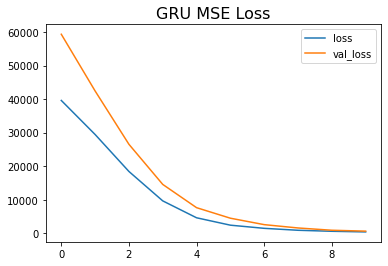

In [56]:
history_df.filter(like='loss').plot();
plt.title("GRU MSE Loss", fontsize=16)
plt.savefig('fig8.png')

In [57]:
dsci_df = pd.DataFrame({'DSCI':west['DSCI']})
dsci_df['Seconds']=dsci_df.index.map(pd.Timestamp.timestamp)

day = 60*60*24
year = 365.2425*day
dsci_df['year sin'] = np.sin(dsci_df['Seconds'] * (2*np.pi/year))
dsci_df['year cos'] = np.cos(dsci_df['Seconds'] * (2*np.pi/year))
dsci_df

,DSCI,Seconds,year sin,year cos
ValidEnd,,,,
2001-01-01,0.0,9.783072e+08,0.008300,0.999966
2001-01-08,15.5,9.789120e+08,0.128365,0.991727
2001-01-15,29.5,9.795168e+08,0.246570,0.969125
2001-01-22,15.0,9.801216e+08,0.361204,0.932487
2001-01-29,28.5,9.807264e+08,0.470607,0.882343
...,...,...,...,...
2020-11-30,304.5,1.606694e+09,-0.513800,0.857910
2020-12-07,306.5,1.607299e+09,-0.407020,0.913419
2020-12-14,333.0,1.607904e+09,-0.294344,0.955699


In [58]:
dsci_df.drop('Seconds', axis=1, inplace=True)

In [59]:
def df_to_X_y2(df, windowsize=6):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-windowsize):
        row = [r for r in df_as_np[i:i+windowsize]]
        X.append(row)
        label = df_as_np[i+5][0]
        y.append(label)
    return np.array(X), np.array(y)

In [60]:
X2, y2 = df_to_X_y2(dsci_df)
X2.shape, y2.shape

((1038, 6, 3), (1038,))

In [61]:
X2_train, y2_train = X2[:750], y2[:750]
X2_val, y2_val = X2[750:850], y2[750:850]
X2_test, y2_test = X2[850:], y2[850:]

In [62]:
dsci_training_mean = np.mean(X2_train[:, :, 0])
temp_training_sd = np.std(X2_train[:, :, 0])

def preprocess(X):
    X[:, :, 0] = (X[:, :, 0] - dsci_training_mean/temp_training_sd)
    return X


In [63]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 1.79446130e+01,  9.65598082e-01, -2.60039120e-01],
        [ 1.79446130e+01,  9.27367405e-01, -3.74151970e-01],
        [ 1.79446130e+01,  8.75705362e-01, -4.82845853e-01],
        [ 1.79446130e+01,  8.11360193e-01, -5.84546523e-01],
        [ 1.79446130e+01,  7.35263828e-01, -6.77781014e-01],
        [ 1.79446130e+01,  6.48518397e-01, -7.61198981e-01]],

       [[ 1.79446130e+01,  9.27367405e-01, -3.74151970e-01],
        [ 1.79446130e+01,  8.75705362e-01, -4.82845853e-01],
        [ 1.79446130e+01,  8.11360193e-01, -5.84546523e-01],
        [ 1.79446130e+01,  7.35263828e-01, -6.77781014e-01],
        [ 1.79446130e+01,  6.48518397e-01, -7.61198981e-01],
        [ 1.79446130e+01,  5.52380262e-01, -8.33592254e-01]],

       [[ 1.79446130e+01,  8.75705362e-01, -4.82845853e-01],
        [ 1.79446130e+01,  8.11360193e-01, -5.84546523e-01],
        [ 1.79446130e+01,  7.35263828e-01, -6.77781014e-01],
        [ 1.79446130e+01,  6.48518397e-01, -7.61198981e-01],
        [ 1.79446130

In [64]:
model4 = Sequential()
model4.add(InputLayer((5,3)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                17408     
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 17,937
Trainable params: 17,937
Non-trainable params: 0
_________________________________________________________________


In [65]:
cp4 = ModelCheckpoint('model3/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer = Adam(learning_rate=0.005), metrics=[RootMeanSquaredError()])

In [66]:
history = (model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4]))

Epoch 1/10


22/24 [==========================>...] - ETA: 0s - loss: 42492.0586 - root_mean_squared_error: 206.1360WARNING:tensorflow:Model was constructed with shape (None, 5, 3) for input KerasTensor(type_spec=TensorSpec(shape=(None, 5, 3), dtype=tf.float32, name='input_4'), name='input_4', description="created by layer 'input_4'"), but it was called on an input with incompatible shape (None, 6, 3).


24/24 [==============================] - 6s 123ms/step - loss: 42558.6055 - root_mean_squared_error: 206.2974 - val_loss: 68257.5312 - val_root_mean_squared_error: 261.2614


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 2/10
24/24 [==============================] - 0s 6ms/step - loss: 39163.0430 - root_mean_squared_error: 197.8965 - val_loss: 60993.1133 - val_root_mean_squared_error: 246.9678


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 3/10
24/24 [==============================] - 0s 12ms/step - loss: 32905.7617 - root_mean_squared_error: 181.3995 - val_loss: 50679.4961 - val_root_mean_squared_error: 225.1211


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 4/10
24/24 [==============================] - 0s 9ms/step - loss: 25311.7812 - root_mean_squared_error: 159.0968 - val_loss: 38705.8242 - val_root_mean_squared_error: 196.7380


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 5/10
24/24 [==============================] - 0s 8ms/step - loss: 17434.9727 - root_mean_squared_error: 132.0415 - val_loss: 27034.5898 - val_root_mean_squared_error: 164.4220


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 6/10
24/24 [==============================] - 0s 7ms/step - loss: 10687.6230 - root_mean_squared_error: 103.3810 - val_loss: 17318.3730 - val_root_mean_squared_error: 131.5993


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 7/10
24/24 [==============================] - 0s 7ms/step - loss: 6107.7026 - root_mean_squared_error: 78.1518 - val_loss: 10661.2178 - val_root_mean_squared_error: 103.2532


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 8/10
24/24 [==============================] - 0s 7ms/step - loss: 3523.5938 - root_mean_squared_error: 59.3599 - val_loss: 6744.3027 - val_root_mean_squared_error: 82.1237


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 9/10
24/24 [==============================] - 0s 7ms/step - loss: 2187.2126 - root_mean_squared_error: 46.7676 - val_loss: 4476.2520 - val_root_mean_squared_error: 66.9048


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 10/10
24/24 [==============================] - 0s 10ms/step - loss: 1450.4860 - root_mean_squared_error: 38.0852 - val_loss: 2889.6331 - val_root_mean_squared_error: 53.7553


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


(     Predictions  Actuals
 0      17.339216     19.5
 1      17.392010     19.5
 2      17.439886     19.5
 3      17.481955     19.5
 4      17.517344     19.5
 ..           ...      ...
 183   266.854950    282.0
 184   267.403107    304.5
 185   267.445587    306.5
 186   267.519897    333.0
 187   267.529297    345.5
 
 [188 rows x 2 columns],
 84.33220022911595)

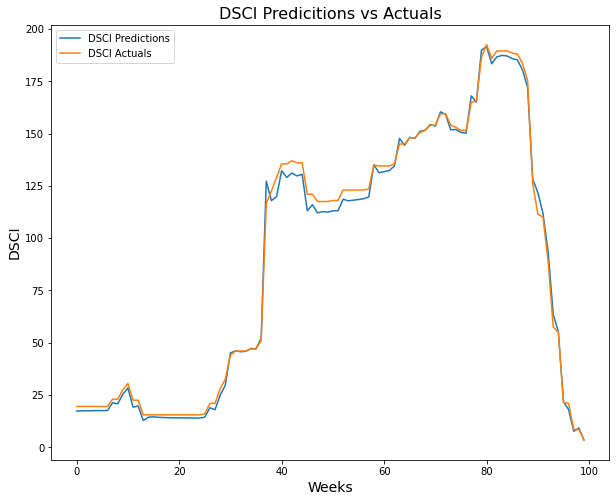

In [67]:
plot_predictions1(9, model4, X2_test, y2_test)

In [68]:
history_df = pd.DataFrame(history.history)
history_df

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,42558.605469,206.297379,68257.531250,261.261414
1,39163.042969,197.896545,60993.113281,246.967834
2,32905.761719,181.399460,50679.496094,225.121063
3,25311.781250,159.096771,38705.824219,196.737961
4,17434.972656,132.041550,27034.589844,164.421982
5,10687.623047,103.380959,17318.373047,131.599289
6,6107.702637,78.151794,10661.217773,103.253174
7,3523.593750,59.359867,6744.302734,82.123703
8,2187.212646,46.767647,4476.251953,66.904800
9,1450.485962,38.085247,2889.633057,53.755306


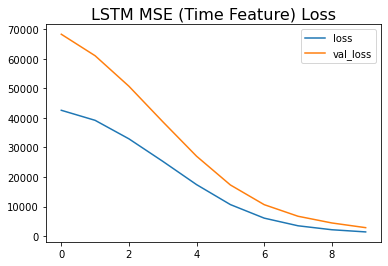

In [69]:
history_df.filter(like='loss').plot();
plt.title("LSTM MSE (Time Feature) Loss", fontsize=16)
plt.savefig('fig10.png')

In [70]:
tmax_dsci_df = pd.concat([west['avg_tmax'], dsci_df], axis=1)

In [71]:
prcp_dsci_df = pd.concat([west['total_avg_prcp_inches'], dsci_df], axis=1)

In [72]:
tmax_dsci_df.head()

,avg_tmax,DSCI,year sin,year cos
ValidEnd,,,,
2001-01-01,55.340909,0.0,0.008300,0.999966
2001-01-08,56.907792,15.5,0.128365,0.991727
2001-01-15,45.813312,29.5,0.246570,0.969125
2001-01-22,47.125649,15.0,0.361204,0.932487
2001-01-29,46.303571,28.5,0.470607,0.882343


In [73]:
prcp_dsci_df.head()

,total_avg_prcp_inches,DSCI,year sin,year cos
ValidEnd,,,,
2001-01-01,0.000000,0.0,0.008300,0.999966
2001-01-08,0.573636,15.5,0.128365,0.991727
2001-01-15,1.895909,29.5,0.246570,0.969125
2001-01-22,0.072500,15.0,0.361204,0.932487
2001-01-29,1.511818,28.5,0.470607,0.882343


In [74]:
def df_to_X_y3(df, windowsize=7):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-windowsize):
        row = [r for r in df_as_np[i:i+windowsize]]
        X.append(row)
        label = df_as_np[i+windowsize][0], df_as_np[i+windowsize][1]
        y.append(label)
    return np.array(X), np.array(y)

In [75]:
X3, y3 = df_to_X_y3(prcp_dsci_df)
X3.shape, y3.shape

((1037, 7, 4), (1037, 2))

In [76]:
X3_train, y3_train = X3[:750], y3[:750]
X3_val, y3_val = X3[750:850], y3[750:850]
X3_test, y3_test = X3[850:], y3[850:]

In [77]:
#Standardizing for Preprocessing. Followed video instructions, but could try a MinMax scaler next time
prcp_training_mean3 = np.mean(X3_train[:, :, 0])
prcp_training_std3 = np.mean(X3_train[:, :, 0])

dsci_training_mean3 = np.mean(X3_train[:, :, 1])
dsci_training_sd3 = np.std(X3_train[:, :, 1])

def preprocess3(X):
    X[:, :, 0] = (X[:, :, 0] - prcp_training_mean3/prcp_training_std3)
    X[:, :, 1] = (X[:, :,1] - dsci_training_mean3/dsci_training_sd3)
    return X
def preprocess_out(X):
    X[:, 0] = (X[:, 0] - prcp_training_mean3/prcp_training_std3)
    X[:, 1] = (X[:,1] - dsci_training_mean3/dsci_training_sd3)
    return X



In [78]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

array([[[-3.33333333e-02,  1.79432586e+01,  9.65598082e-01,
         -2.60039120e-01],
        [-2.27500000e-01,  1.79432586e+01,  9.27367405e-01,
         -3.74151970e-01],
        [-7.27500000e-01,  1.79432586e+01,  8.75705362e-01,
         -4.82845853e-01],
        ...,
        [-7.60000000e-01,  1.79432586e+01,  7.35263828e-01,
         -6.77781014e-01],
        [-7.49166667e-01,  1.79432586e+01,  6.48518397e-01,
         -7.61198981e-01],
        [-9.82500000e-01,  1.79432586e+01,  5.52380262e-01,
         -8.33592254e-01]],

       [[-2.27500000e-01,  1.79432586e+01,  9.27367405e-01,
         -3.74151970e-01],
        [-7.27500000e-01,  1.79432586e+01,  8.75705362e-01,
         -4.82845853e-01],
        [-5.22500000e-01,  1.79432586e+01,  8.11360193e-01,
         -5.84546523e-01],
        ...,
        [-7.49166667e-01,  1.79432586e+01,  6.48518397e-01,
         -7.61198981e-01],
        [-9.82500000e-01,  1.79432586e+01,  5.52380262e-01,
         -8.33592254e-01],
        [-9.650

In [79]:
preprocess_out(X3_train)
preprocess_out(X3_val)
preprocess_out(X3_test)

array([[[-1.03333333e+00,  1.69432586e+01, -3.44019180e-02,
         -1.26003912e+00],
        [-1.78424143e+00,  1.63865171e+01, -6.29374023e-01,
         -1.93089340e+00],
        [-7.27500000e-01,  1.79432586e+01,  8.75705362e-01,
         -4.82845853e-01],
        ...,
        [-7.60000000e-01,  1.79432586e+01,  7.35263828e-01,
         -6.77781014e-01],
        [-7.49166667e-01,  1.79432586e+01,  6.48518397e-01,
         -7.61198981e-01],
        [-9.82500000e-01,  1.79432586e+01,  5.52380262e-01,
         -8.33592254e-01]],

       [[-1.22750000e+00,  1.69432586e+01, -7.26325951e-02,
         -1.37415197e+00],
        [-2.28424143e+00,  1.63865171e+01, -6.81036065e-01,
         -2.03958728e+00],
        [-5.22500000e-01,  1.79432586e+01,  8.11360193e-01,
         -5.84546523e-01],
        ...,
        [-7.49166667e-01,  1.79432586e+01,  6.48518397e-01,
         -7.61198981e-01],
        [-9.82500000e-01,  1.79432586e+01,  5.52380262e-01,
         -8.33592254e-01],
        [-9.650

In [80]:
model5 = Sequential()
model5.add(InputLayer((7,4)))
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(2, 'linear'))
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 64)                17664     
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 18        
Total params: 18,202
Trainable params: 18,202
Non-trainable params: 0
_________________________________________________________________


In [81]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer = Adam(learning_rate=0.005), metrics=[RootMeanSquaredError()])

In [82]:
history = (model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5]))

Epoch 1/10
24/24 [==============================] - 8s 33ms/step - loss: 21283.2637 - root_mean_squared_error: 145.8878 - val_loss: 32320.3809 - val_root_mean_squared_error: 179.7787


INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


Epoch 2/10
24/24 [==============================] - 0s 9ms/step - loss: 19300.5098 - root_mean_squared_error: 138.9263 - val_loss: 28471.3496 - val_root_mean_squared_error: 168.7346


INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


Epoch 3/10
24/24 [==============================] - 0s 12ms/step - loss: 16023.6885 - root_mean_squared_error: 126.5847 - val_loss: 23167.6797 - val_root_mean_squared_error: 152.2093


INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


Epoch 4/10
24/24 [==============================] - 0s 13ms/step - loss: 11853.0596 - root_mean_squared_error: 108.8718 - val_loss: 16968.9395 - val_root_mean_squared_error: 130.2649


INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


Epoch 5/10
24/24 [==============================] - 1s 21ms/step - loss: 7782.1484 - root_mean_squared_error: 88.2165 - val_loss: 11246.2529 - val_root_mean_squared_error: 106.0484


INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


Epoch 6/10
24/24 [==============================] - 0s 11ms/step - loss: 4594.5215 - root_mean_squared_error: 67.7829 - val_loss: 6964.7427 - val_root_mean_squared_error: 83.4550


INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


Epoch 7/10
24/24 [==============================] - 0s 9ms/step - loss: 2629.0383 - root_mean_squared_error: 51.2741 - val_loss: 4322.3633 - val_root_mean_squared_error: 65.7447


INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


Epoch 8/10
24/24 [==============================] - 0s 9ms/step - loss: 1560.7157 - root_mean_squared_error: 39.5059 - val_loss: 2793.1843 - val_root_mean_squared_error: 52.8506


INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


Epoch 9/10
24/24 [==============================] - 0s 8ms/step - loss: 1019.0264 - root_mean_squared_error: 31.9222 - val_loss: 1895.8572 - val_root_mean_squared_error: 43.5414


INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


Epoch 10/10
24/24 [==============================] - 0s 8ms/step - loss: 714.6318 - root_mean_squared_error: 26.7326 - val_loss: 1245.6741 - val_root_mean_squared_error: 35.2941


INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


In [83]:
def plot_predictions2(fignum, model, X, y, start=0, end = 100):
    predictions = model.predict(X)
    prcp_preds, dsci_preds = predictions[:, 0], predictions[:, 1]
    prcp_actuals, dsci_actuals = y[:, 0], y[:, 1]
    df = pd.DataFrame(data= {
        'Precipitation Predictions': prcp_preds, 
        'Precipitation Actuals': prcp_actuals,
        'DSCI Pred': dsci_preds,
        'DSCI Actuals': dsci_actuals
        })
    plt.plot(df['Precipitation Predictions'][start:end], label='Precipitation Pred')
    plt.plot(df['Precipitation Actuals'][start:end], label='Precipitation Actual')
    plt.plot(df['DSCI Pred'][start:end], label = 'DSCI Predictions')
    plt.plot(df['DSCI Actuals'][start:end], label = 'DSCI Actuals')
    plt.legend(loc= 'upper left')
    plt.savefig(f'fig{fignum}.png')

    return df[start:end]


,Precipitation Predictions,Precipitation Actuals,DSCI Pred,DSCI Actuals
0,0.350201,0.035000,18.129025,19.5
1,0.354329,0.749167,18.066074,19.5
2,0.377148,0.023333,14.055846,19.5
3,0.345724,0.010000,15.287726,19.5
4,0.352279,0.005000,18.002151,19.5
...,...,...,...,...
95,0.422576,0.760000,5.003932,8.5
96,0.338372,1.267500,5.227018,8.5
97,0.318854,0.435000,7.683122,3.5
98,0.304457,0.490000,2.925890,3.0


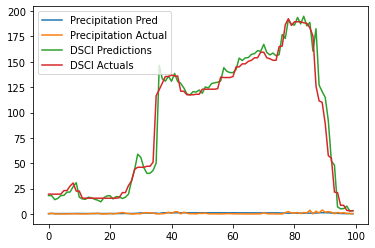

In [84]:
plot_predictions2(11, model5, X3_test, y3_test)

In [85]:
def postprocess_dsci(arr):
    arr = (arr*dsci_training_sd3) + dsci_training_mean3
    return arr

def postprocess_prcp(arr):
    arr = (arr*prcp_training_std3) + prcp_training_mean3
    return arr

In [86]:
def plot_predictions2(fignum, model, X, y, start=0, end = 100):
    predictions = model.predict(X)
    prcp_preds, dsci_preds = postprocess_prcp(predictions[:, 0]), postprocess_dsci(predictions[:, 1])
    prcp_actuals, dsci_actuals = postprocess_prcp(y[:, 0]), postprocess_dsci(y[:, 1])
    df = pd.DataFrame(data= {
        'Precipitation Predictions': prcp_preds, 
        'Precipitation Actuals': prcp_actuals,
        'DSCI Pred': dsci_preds,
        'DSCI Actuals': dsci_actuals
        })
    plt.plot(df['Precipitation Predictions'][start:end])
    plt.plot(df['Precipitation Actuals'][start:end])
    plt.plot(df['DSCI Pred'][start:end])
    plt.plot(df['DSCI Actuals'][start:end])
    plt.savefig(f'fig{str(fignum)}.png')
    return df[start:end]

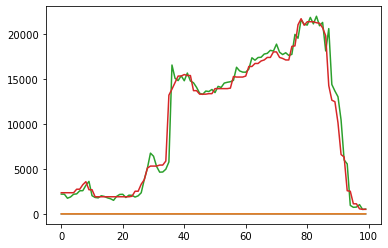

In [87]:
post_processed_df = plot_predictions2(12, model5, X3_test, y3_test)

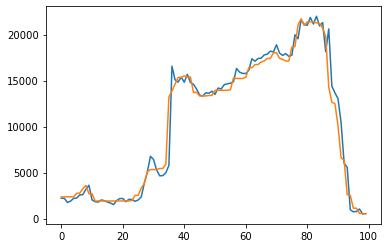

In [88]:
start, end = 0, 100
plt.plot(post_processed_df['DSCI Pred'][start: end])
plt.plot(post_processed_df['DSCI Actuals'][start: end])

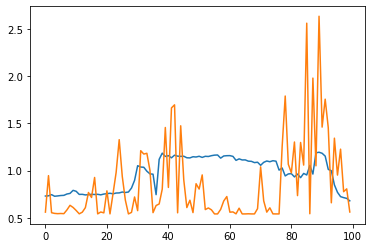

In [89]:
start, end = 0, 100
plt.plot(post_processed_df['Precipitation Predictions'][start: end])
plt.plot(post_processed_df['Precipitation Actuals'][start: end])

In [90]:
history_df = pd.DataFrame(history.history)
history_df

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,21283.263672,145.887848,32320.380859,179.778687
1,19300.509766,138.926270,28471.349609,168.734573
2,16023.688477,126.584694,23167.679688,152.209320
3,11853.059570,108.871758,16968.939453,130.264893
4,7782.148438,88.216484,11246.252930,106.048355
5,4594.521484,67.782898,6964.742676,83.455032
6,2629.038330,51.274147,4322.363281,65.744682
7,1560.715698,39.505890,2793.184326,52.850586
8,1019.026428,31.922194,1895.857178,43.541439
9,714.631836,26.732599,1245.674072,35.294109


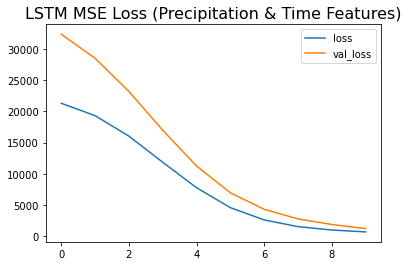

In [91]:
history_df.filter(like='loss').plot();
plt.title("LSTM MSE Loss (Precipitation & Time Features)", fontsize=16)
plt.savefig('fig13.png')